## 1. Data Understanding and Preprocessing


### 1.a Understanding

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'data/dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   customerID  Gender  Senior Citizen Marital Status Dependents  \
0  5522-JBWMO    Male               0             No        Yes   
1  5275-PMFUT    Male               0            Yes        Yes   
2  5609-CEBID  Female               1             No         No   
3  4381-MHQDC  Female               0             No         No   
4  6353-BRMMA  Female               0            Yes        Yes   

   tenure in months Priority Account Credit Cards  Loan Account Netbanking  \
0               1.0              Yes           No  general loan         No   
1              72.0               No           No  general loan        Yes   
2              20.0              Yes          Yes   top up loan         No   
3              47.0              Yes          Yes  general loan        Yes   
4              54.0              Yes          Yes   top up loan        Yes   

   ... Zero Balance Account  FDs Interest Deposited Paperless Banking  \
0  ...                  

In [2]:
import sys 
print(sys.executable)

c:\Users\Vivobook\OneDrive\Desktop\Project\Customer_churn\.venv\Scripts\python.exe


In [3]:

# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     999 non-null    object 
 1   Gender                         999 non-null    object 
 2   Senior Citizen                 999 non-null    int64  
 3   Marital Status                 999 non-null    object 
 4   Dependents                     997 non-null    object 
 5   tenure in months               994 non-null    float64
 6   Priority Account               997 non-null    object 
 7   Credit Cards                   997 non-null    object 
 8   Loan Account                   998 non-null    object 
 9   Netbanking                     998 non-null    object 
 10  Debit Card                     999 non-null    object 
 11  MobileApp                      999 non-null    object 
 12  TechSupport Availed         

In [4]:
# Display summary statistics
# since describe only works on numerical data
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Senior Citizen  tenure in months  Monthly Average Balance (USD)  \
count      999.000000        994.000000                     995.000000   
mean         0.163163         32.247485                      66.455578   
std          0.369700         24.800698                      29.922493   
min          0.000000          0.000000                      18.950000   
25%          0.000000          8.000000                      42.000000   
50%          0.000000         29.000000                      74.250000   
75%          0.000000         56.000000                      90.050000   
max          1.000000         72.000000                     116.250000   

       Recommendation  
count             0.0  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN  


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID                         0
Gender                             0
Senior Citizen                     0
Marital Status                     0
Dependents                         2
tenure in months                   5
Priority Account                   2
Credit Cards                       2
Loan Account                       1
Netbanking                         1
Debit Card                         0
MobileApp                          0
TechSupport Availed                1
Zero Balance Account               2
FDs                                4
Interest Deposited                 0
Paperless Banking                  2
Monthly Average Balance (USD)      4
Yearly Average Balance (USD)       4
Churn                             16
Customer Feedback                  0
Category                          27
Recommendation                   999
dtype: int64


### 1.b Cleaning + Preprocessing

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'data/dataset.csv'  # Replace with the actual path to your dataset
df = pd.read_csv(file_path)

# Checking for the presence of the 'Churn' column before preprocessing
if 'Churn' in df.columns:
    print("The 'Churn' column is present in the original dataset.")
    print("Unique values in 'Churn' column:", df['Churn'].unique())
else:
    print("The 'Churn' column is NOT present in the original dataset.")

# Handle missing values
# Fill missing 'Senior Citizen' values with the median
imputer = SimpleImputer(strategy='median')
df['Senior Citizen'] = imputer.fit_transform(df[['Senior Citizen']])

# Drop rows with missing 'customerID'
df = df.dropna(subset=['customerID'])

# Fill other missing values with forward fill method
df = df.fillna(method='ffill')

# Handle NaN values in the 'Churn' column
df['Churn'] = df['Churn'].fillna('No')

# Handle NaN values in the 'Recommendation' column separately
df['Recommendation'] = df['Recommendation'].fillna('No Recommendation')

# Partition numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Handle NaN values in numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle NaN values in non-numeric columns (using forward fill)
df[non_numeric_cols] = df[non_numeric_cols].fillna(method='ffill')

# Check for NaN values
if df.isnull().values.any():
    print("There are still NaN values in the dataset. Handling them explicitly...")
    print(df.isnull().sum())
    df = df.dropna()
    print("NaN values handled by dropping remaining rows with NaN values.")
else:
    print("No NaN values in the dataset.")

# Check for infinite values in numeric columns
if np.isinf(df[numeric_cols].values).any():
    print("There are infinite values in the numeric columns of the dataset. Handling them...")
    df[numeric_cols] = np.where(np.isinf(df[numeric_cols]), np.nan, df[numeric_cols])
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
else:
    print("No infinite values in the numeric columns of the dataset.")

# Convert categorical columns to numerical, excluding 'Churn' and 'Customer Feedback'
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in ['Churn', 'Customer Feedback']]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Save the cleaned and processed data with 'Customer Feedback'
cleaned_file_path = 'data/cleaned_dataset.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

# Save the 'Customer Feedback' column separately for NLP analysis
feedback_file_path = 'data/customer_feedback.csv'
df[['Customer Feedback']].to_csv(feedback_file_path, index=False)
print(f"Customer feedback saved to {feedback_file_path}")

# Check for the presence of the 'Churn' column after preprocessing
if 'Churn' in df.columns:
    print("The 'Churn' column is present after preprocessing.")
    print("Unique values in 'Churn' column:", df['Churn'].unique())
else:
    print("The 'Churn' column is NOT present after preprocessing.")

The 'Churn' column is present in the original dataset.
Unique values in 'Churn' column: ['No' 'Yes' nan]
No NaN values in the dataset.
No infinite values in the numeric columns of the dataset.


C:\Users\Vivobook\AppData\Local\Temp\ipykernel_25764\1172833520.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_25764\1172833520.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[non_numeric_cols] = df[non_numeric_cols].fillna(method='ffill')


Cleaned data saved to data/cleaned_dataset.csv
Customer feedback saved to data/customer_feedback.csv
The 'Churn' column is present after preprocessing.
Unique values in 'Churn' column: ['No' 'Yes']


In [7]:
# Load the cleaned dataset
file_path = 'data/cleaned_dataset.csv'
df = pd.read_csv(file_path)

# Extract features
X = df.drop(columns=['Churn'])

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Display unique values in non-numeric columns
for col in non_numeric_columns:
    print(f"Unique values in {col}: {X[col].unique()}")

Non-numeric columns: Index(['Customer Feedback'], dtype='object')
Unique values in Customer Feedback: ['My Credit Card is not generating OTP.'
 'The Current Account charges are too high.'
 'The loan prepayment charges are too high.'
 'The Savings Account opening process was very smooth.'
 'The loan documentation process is very complicated.'
 'The Debit Card activation process took too long.'
 'I am satisfied with the easy online account opening for my Savings Account.'
 'The branch does not have enough seating.'
 'The Debit Card replacement process was very quick.'
 'The loan interest rate was increased without any prior notice.'
 'The Current Account management is very convenient.'
 'The fixed deposit rates are not competitive.'
 'The Current Account online services are very reliable.'
 'The Savings Account services are very reliable.'
 'The Savings Account minimum balance requirement is too high.'
 'The mobile app does not support my device.'
 'The loan disbursement process is very 

### 1.c EDA

Dataset Loaded Successfully!
Shape of dataset: (999, 2013)
First 5 rows of dataset:
   Senior Citizen  tenure in months  Monthly Average Balance (USD) Churn  \
0             0.0               1.0                           44.0    No   
1             0.0              72.0                           64.8    No   
2             1.0              20.0                           94.1   Yes   
3             0.0              47.0                           65.0    No   
4             0.0              54.0                          104.1    No   

                                   Customer Feedback  customerID_0030-FNXPP  \
0              My Credit Card is not generating OTP.                  False   
1          The Current Account charges are too high.                  False   
2          The loan prepayment charges are too high.                  False   
3  The Savings Account opening process was very s...                  False   
4  The loan documentation process is very complic...            

C:\Users\Vivobook\AppData\Local\Temp\ipykernel_25764\4179702824.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


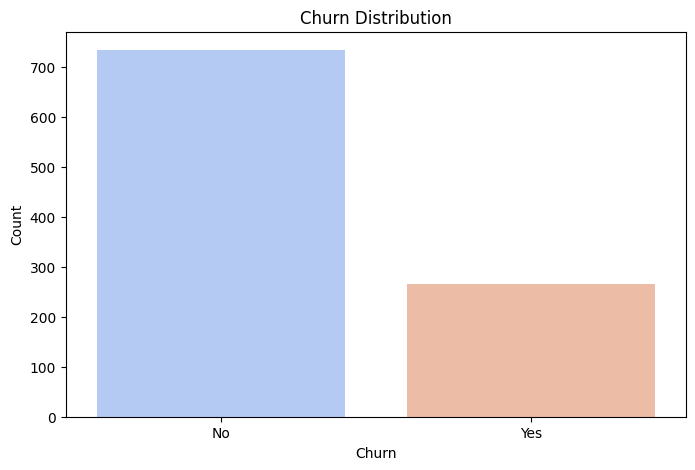

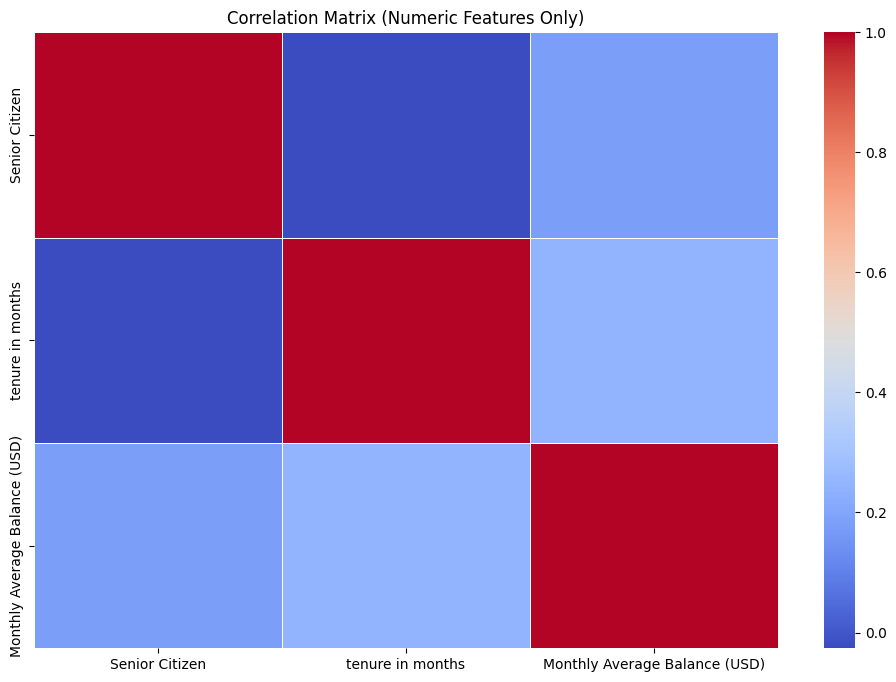


Execution completed successfully!


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file path
file_path = 'data/cleaned_dataset.csv'

# Check if the file exists before loading
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found. Please check the path.")
else:
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display dataset info
    print("Dataset Loaded Successfully!")
    print(f"Shape of dataset: {df.shape}")
    print("First 5 rows of dataset:")
    print(df.head())

    # Verify 'Churn' column presence
    if 'Churn' in df.columns:
        print("\nThe 'Churn' column is present in the dataset.")
        print("Unique values in 'Churn' column:", df['Churn'].unique())

        # Churn Distribution Plot
        plt.figure(figsize=(8, 5))
        sns.countplot(x='Churn', data=df, palette='coolwarm')
        plt.title('Churn Distribution')
        plt.xlabel('Churn')
        plt.ylabel('Count')
        plt.show()

        # Correlation Matrix (Optimized)
        numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

        if numeric_df.shape[1] > 1:  # Ensure there's more than one numeric column
            plt.figure(figsize=(12, 8))
            sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
            plt.title('Correlation Matrix (Numeric Features Only)')
            plt.show()
        else:
            print("Not enough numeric columns for correlation matrix.")

    else:
        print("\nError: The 'Churn' column is NOT present in the dataset.")

    print("\nExecution completed successfully!")


In [9]:
#df.select_dtypes(include=['number','object'])
df.select_dtypes(exclude=['number','object'])#boolean columns


,customerID_0030-FNXPP,customerID_0036-IHMOT,customerID_0048-LUMLS,customerID_0067-DKWBL,customerID_0078-XZMHT,customerID_0094-OIFMO,customerID_0104-PPXDV,customerID_0111-KLBQG,customerID_0114-IGABW,customerID_0115-TFERT,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
## run once per setup of environment
# !pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------------------------------

In [10]:
# box tidwell test for logistic regression
import statsmodels.api as sm 
import numpy as np 
X=df.select_dtypes(include='number')
y=df['Churn'].map({'Yes':1, 'No':0}).astype(float)

for col in X.columns:
    X[f'{col}_log'] = X[col] * np.log(X[col]+1e-6) 

X_const=sm.add_constant(X)
model=sm.Logit(y,X_const).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.464416
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  999
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Nov 2025   Pseudo R-squ.:                  0.1986
Time:                        19:39:40   Log-Likelihood:                -463.95
converged:                       True   LL-Null:                       -578.93
Covariance Type:            nonrobust   LLR p-value:                 1.092e-47
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.5318      1.599     -0

## 2.Predictive Models For Churn Anlysis

In [11]:
# Import necessary libraries
import pandas as pd  # Data manipulation
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import StandardScaler  # Standardization
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Visualization


In [12]:
# Load the cleaned dataset
file_path = 'data/cleaned_dataset.csv'  # Path to the dataset
df = pd.read_csv(file_path)  # Read CSV file into a Pandas DataFrame

# Display the first 5 rows to understand the data
df.head()


,Senior Citizen,tenure in months,Monthly Average Balance (USD),Churn,Customer Feedback,customerID_0030-FNXPP,customerID_0036-IHMOT,customerID_0048-LUMLS,customerID_0067-DKWBL,customerID_0078-XZMHT,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
0,0.0,1.0,44.0,No,My Credit Card is not generating OTP.,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,72.0,64.8,No,The Current Account charges are too high.,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,20.0,94.1,Yes,The loan prepayment charges are too high.,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.0,47.0,65.0,No,The Savings Account opening process was very s...,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,54.0,104.1,No,The loan documentation process is very complic...,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [13]:
# Extract features and target variable
X = df.drop(columns=['Churn', 'Customer Feedback'])  # Exclude 'Customer Feedback'
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the shape of X and y
X.shape, y.shape


((999, 2011), (999,))

In [14]:
# Check for NaN values in features
if X.isnull().values.any():
    print("There are NaN values in the features. Handling them...")
    X = X.fillna(X.mean())
else:
    print("No NaN values in the features.")


No NaN values in the features.


In [15]:
# Check for infinite values in numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
if np.isinf(X[numeric_cols].values).any():
    print("There are infinite values in the numeric columns of the features. Handling them...")
    X[numeric_cols] = np.where(np.isinf(X[numeric_cols]), np.nan, X[numeric_cols])
    X = X.fillna(X.mean())
else:
    print("No infinite values in the numeric columns of the features.")


No infinite values in the numeric columns of the features.


In [16]:
# Ensure all features are numeric
if any(X.dtypes == 'object'):
    raise ValueError("There are non-numeric values in the features. Please ensure all features are numeric.")


In [17]:
X

,Senior Citizen,tenure in months,Monthly Average Balance (USD),customerID_0030-FNXPP,customerID_0036-IHMOT,customerID_0048-LUMLS,customerID_0067-DKWBL,customerID_0078-XZMHT,customerID_0094-OIFMO,customerID_0104-PPXDV,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
0,0.0,1.0,44.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,72.0,64.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,20.0,94.10,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.0,47.0,65.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,54.0,104.10,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,44.0,20.40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
995,1.0,66.0,45.55,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,0.0,9.0,48.60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,0.0,29.0,75.55,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [18]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
#train test split for random forest doestn require scalings.
X_train_rf=X_train.copy()
X_test_rf=X_test.copy()

In [20]:
X_train_rf

,Senior Citizen,tenure in months,Monthly Average Balance (USD),customerID_0030-FNXPP,customerID_0036-IHMOT,customerID_0048-LUMLS,customerID_0067-DKWBL,customerID_0078-XZMHT,customerID_0094-OIFMO,customerID_0104-PPXDV,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
778,0.0,1.0,69.55,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
286,0.0,53.0,25.55,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
165,0.0,72.0,25.40,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
960,0.0,6.0,55.15,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
493,0.0,28.0,104.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,44.0,19.90,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270,0.0,6.0,19.70,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
860,0.0,68.0,55.90,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
435,0.0,15.0,105.10,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [21]:
# Standardize the features
#train test split for logistic regression
scaler = StandardScaler()  # Initialize StandardScaler
X_train_lr = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_lr = scaler.transform(X_test)  # Transform test data


In [24]:
#logistic regression model 
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_lr, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_log=logistic_regression_model.predict_proba(X_test_lr)[:,1]
auc_1=roc_auc_score(y_test,y_pred_log)
auc_1

0.8260168650793651

In [31]:
# random forest model 
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_rf, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
# Make predictions on the test data
y_pred_lr = logistic_regression_model.predict(X_test_lr)  # Predictions using Logistic Regression
y_pred_rf = random_forest_model.predict(X_test_rf)  # Predictions using Random Forest


In [33]:
y_pred_rand= random_forest_model.predict_proba(X_test_rf)[:,1]
auc_2=roc_auc_score(y_test,y_pred_rand)
auc_2


0.8122519841269842

In [36]:
# Function to evaluate a model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, y_pred_lr)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(y_test, y_pred_rf)

print("Logistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-Score: {lr_f1:.4f}, AUC:{auc_1:.4f}")

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}, AUC:{auc_2:.4f}")


Logistic Regression Performance:
Accuracy: 0.7200, Precision: 0.5000, Recall: 0.0357, F1-Score: 0.0667, AUC:0.8260
Random Forest Performance:
Accuracy: 0.7550, Precision: 0.6842, Recall: 0.2321, F1-Score: 0.3467, AUC:0.8123


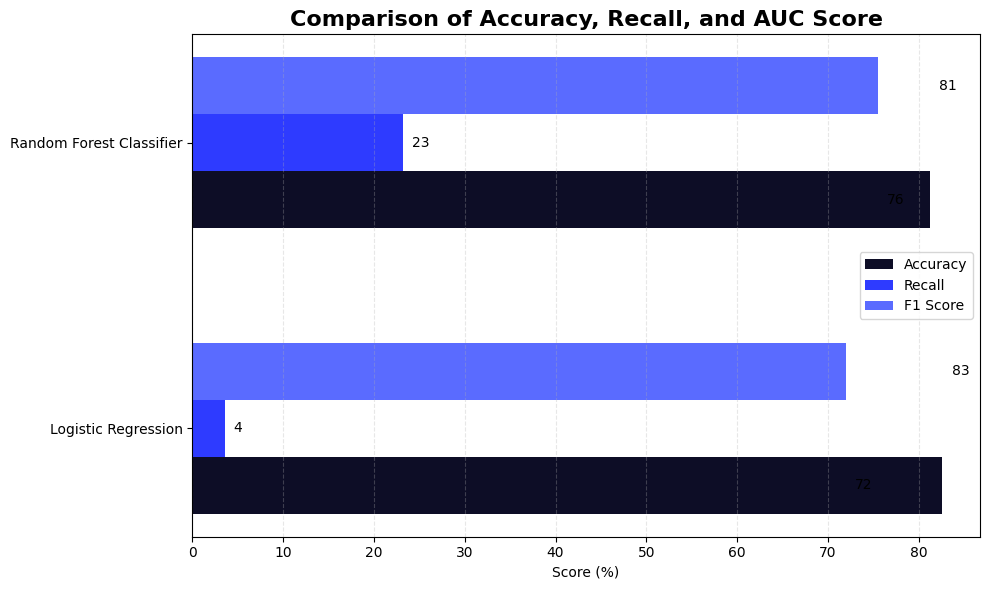

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# REPLACE THESE WITH YOUR SCORES
# ------------------------------
log_reg_accuracy = lr_accuracy
log_reg_recall = lr_recall
log_reg_auc = auc_1

rf_accuracy = rf_accuracy
rf_recall = rf_recall
rf_auc = auc_2

# model names
models = ['Logistic Regression', 'Random Forest Classifier']

# metrics in same order for both models
accuracy_scores = [log_reg_accuracy*100, rf_accuracy*100]
recall_scores   = [log_reg_recall*100,   rf_recall*100]
auc_scores      = [log_reg_auc*100,       rf_auc*100]

# y positions
y_pos = np.arange(len(models))

bar_height = 0.20  # thickness of bars

plt.figure(figsize=(10, 6))
plt.title("Comparison of Accuracy, Recall, and AUC Score", fontsize=16, weight='bold')

# Horizontal bars (3 metrics)
plt.barh(y_pos - bar_height, auc_scores, height=bar_height, label="Accuracy", color="#0D0D26")
plt.barh(y_pos, recall_scores, height=bar_height, label="Recall", color="#2E3BFF")
plt.barh(y_pos + bar_height, accuracy_scores, height=bar_height, label="F1 Score", color="#5A6BFF")

# Label values on bars
for i, scores in enumerate([accuracy_scores, recall_scores, auc_scores]):
    for j, score in enumerate(scores):
        plt.text(score + 1,                # x position
                 y_pos[j] + (i-1)*bar_height,
                 f"{score:.0f}", va='center', fontsize=10)

# y-axis labels
plt.yticks(y_pos, models)

plt.xlabel("Score (%)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


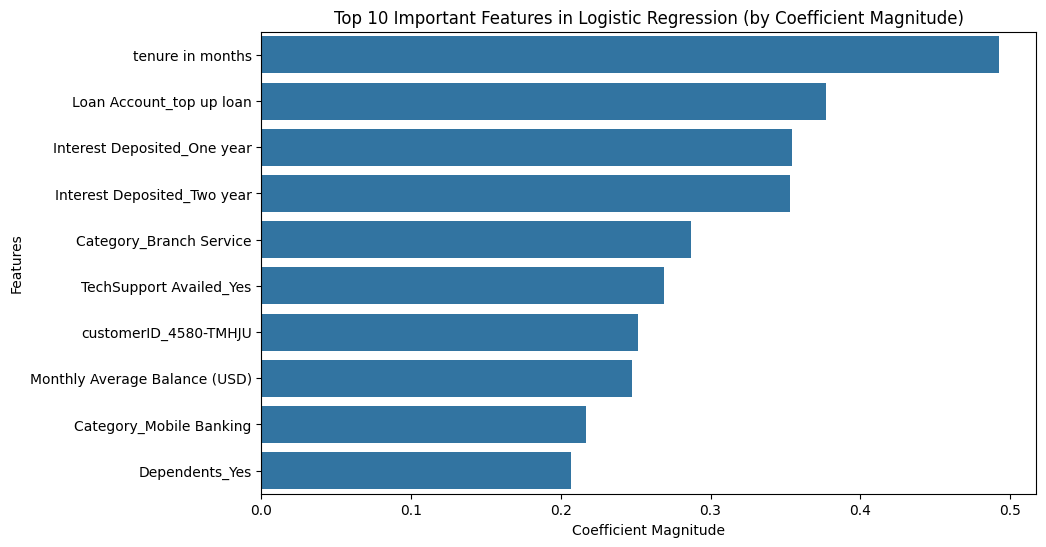

In [44]:
#exxtract feture importance from Logistic regression
coefficients = logistic_regression_model.coef_[0]
# Create DataFrame for feature importance
log_reg_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})
# Sort by absolute coefficient magnitude
log_reg_importance = log_reg_importance.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Abs_Coefficient',
    y='Feature',
    data=log_reg_importance.head(10),
    dodge=False,
)
plt.title('Top 10 Important Features in Logistic Regression (by Coefficient Magnitude)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()


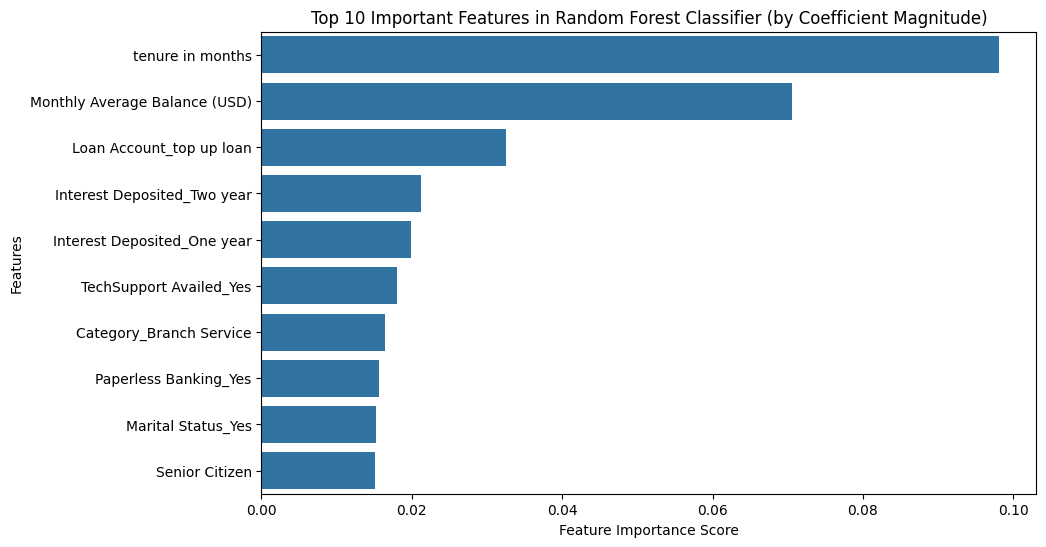

In [69]:
# Extract feature importance from Random Forest model
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train_rf.columns)

# Select the top 10 important features
top_features = feature_importances.nlargest(10)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 10 Important Features in Random Forest Classifier (by Coefficient Magnitude)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


## 3. NLP for Customer Feedback Anlysis 

### 3.a Updated Data Preprocessing Script for NLP
#### Preprocess Customer Feedback Data 

In [45]:
# Load the cleaned dataset
file_path = 'data/cleaned_dataset.csv'
df = pd.read_csv(file_path)

# Display the column names
print(df.columns)

Index(['Senior Citizen', 'tenure in months', 'Monthly Average Balance (USD)',
       'Churn', 'Customer Feedback', 'customerID_0030-FNXPP',
       'customerID_0036-IHMOT', 'customerID_0048-LUMLS',
       'customerID_0067-DKWBL', 'customerID_0078-XZMHT',
       ...
       'Category_Debit Card', 'Category_Debit Cards', 'Category_Fixed Deposit',
       'Category_General', 'Category_Loans', 'Category_Mobile',
       'Category_Mobile Banking', 'Category_Online Banking',
       'Category_Savings', 'Category_Savings Account'],
      dtype='object', length=2013)


In [71]:
#run once
#!pip install nltk 

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download NLTK stopwords
nltk.download('stopwords')

# Load the customer feedback data
file_path = 'data/customer_feedback.csv'
feedback_df = pd.read_csv(file_path)

# Display the column names to confirm the correct column name
print(feedback_df.columns)

# Extract the 'Customer Feedback' column (use the exact column name as displayed)
feedback = feedback_df['Customer Feedback']  # Adjust this if the column name is different

# Text cleaning function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove all extra spaces
    text = text.lower()  # Convert text to lowercase
    return text

# Apply text cleaning
feedback = feedback.apply(clean_text)

# Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))
feedback = feedback.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Save the cleaned feedback to a new CSV file
cleaned_feedback_file_path = 'data/cleaned_feedback.csv'
feedback.to_csv(cleaned_feedback_file_path, index=False)
print(f"Cleaned feedback saved to {cleaned_feedback_file_path}")

Index(['Customer Feedback'], dtype='object')
Cleaned feedback saved to data/cleaned_feedback.csv


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vivobook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3.b Sentiment Analysis

In [73]:
#run once
#!pip install textblob

In [47]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Load the cleaned feedback data
file_path = 'data/cleaned_feedback.csv'
feedback = pd.read_csv(file_path)

# Function to get sentiment of text
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
feedback['Sentiment'] = feedback['Customer Feedback'].apply(get_sentiment)

# Save the sentiment analysis results to a new CSV file
sentiment_file_path = 'data/feedback_sentiment.csv'
feedback.to_csv(sentiment_file_path, index=False)
print(f"Feedback sentiment analysis results saved to {sentiment_file_path}")

Feedback sentiment analysis results saved to data/feedback_sentiment.csv


### 3.c Topic Modeling 

In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Load the cleaned feedback data
file_path = 'data/cleaned_feedback.csv'
feedback = pd.read_csv(file_path)

# Vectorize the feedback data
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
feedback_matrix = vectorizer.fit_transform(feedback['Customer Feedback'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(feedback_matrix)

# Get the topic keywords
def get_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return topics

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = get_topics(lda, feature_names, n_top_words)

# Save the topics to a new CSV file
topics_df = pd.DataFrame(topics)
topics_file_path = 'data/feedback_topics.csv'
topics_df.to_csv(topics_file_path, index=False)
print(f"Feedback topics saved to {topics_file_path}")

Feedback topics saved to data/feedback_topics.csv


## Generative AI for Retention Strategies

This part of the project focusses on developing an AI-driven customer retention system that analyzes feedback using NLP and generates personalized improvement strategies using Generative AI. The process began with sentiment analysis and topic modeling to classify customer emotions and identify key issues from raw feedback. These insights were then used as inputs for local large language models (LLMs), such as Qwen via Ollama, to automatically generate concise, empathetic, and actionable retention strategies tailored to each customer. The generated outputs were cleaned, scored, and evaluated using a rule-based effectiveness framework that measured the presence of action-oriented and empathetic phrases. Finally, the system’s performance was visualized and analyzed to assess the average effectiveness across positive, neutral, and negative sentiments—offering valuable insights into customer experience and model behavior.

The architecture for the same is given 

In [ ]:
# [Raw Feedback Data]
#         ↓
# [Sentiment Analysis + Topic Modeling]
#         ↓
# [LLM-based Strategy Generation (Ollama/Qwen)]
#         ↓
# [Post-Processing & Cleaning]
#         ↓
# [Strategy Evaluation (Rule-based Scoring)]
#         ↓
# [Visualization & Insight Reporting]


### Visualization of Strategy 


Note that this analysis of the strategy is based on first 100 rows of the feedback data it can be done for the whole dataset by doing changes in the strategy_generator

In [49]:
import pandas as pd 
df=pd.read_csv('outputs/evaluated_retention_strategies.csv')
df.head()

,Customer Feedback,Sentiment,Retention Strategy,Score,Reason,Strategy Effectiveness
0,credit card generating otp,Neutral,Offer a simple way to generate OTPs through yo...,4.0,action:2,Effective
1,current account charges high,Positive,Celebrate the positive experience of our curre...,1.0,len>=16,Needs Review
2,loan prepayment charges high,Positive,Appreciate and support your high savings rates...,4.0,"action:1, empathy:1, len>=16",Effective
3,savings account opening process smooth,Positive,Encourage using our mobile app for seamless sa...,1.0,len>=16,Needs Review
4,loan documentation process complicated,Negative,We understand the complexity of your loan docu...,8.0,"action:3, empathy:1, len>=16",Effective


In [50]:
df['Strategy Effectiveness'].nunique()

2

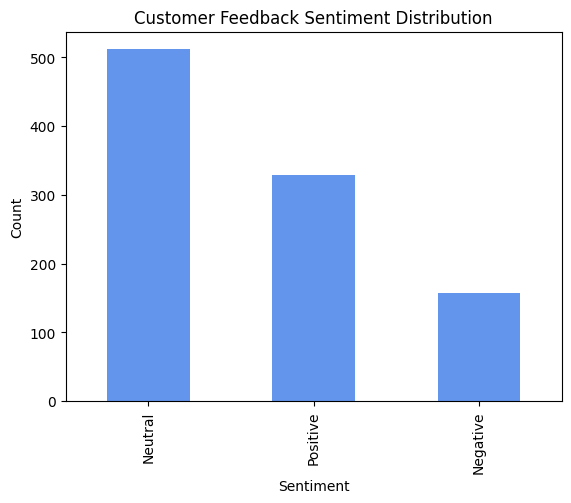

In [5]:
import matplotlib.pyplot as plt
df["Sentiment"].value_counts().plot(kind="bar", color='cornflowerblue')
plt.title("Customer Feedback Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


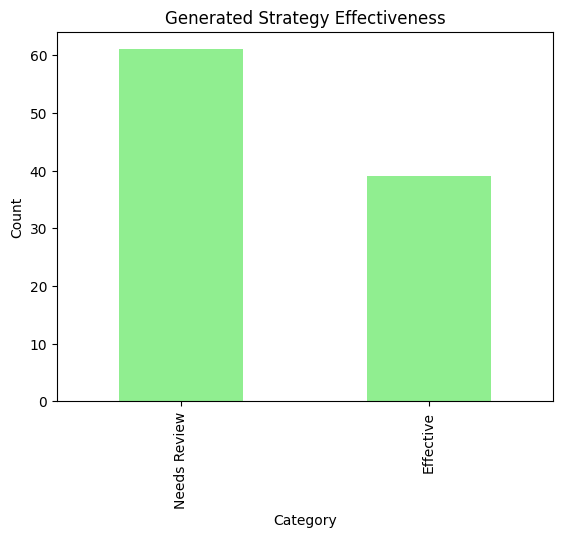

In [51]:
df["Strategy Effectiveness"].value_counts().plot(kind="bar", color='lightgreen')
plt.title("Generated Strategy Effectiveness")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


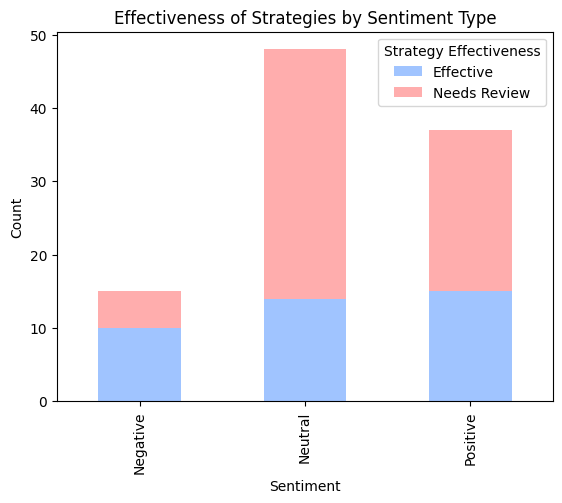

In [52]:
pd.crosstab(df["Sentiment"], df["Strategy Effectiveness"]).plot(
    kind="bar", stacked=True, color=["#a0c4ff", "#ffadad"]
)
plt.title("Effectiveness of Strategies by Sentiment Type")
plt.ylabel("Count")
plt.show()


In [ ]:
#run only once
#!pip install wordcloud


ERROR: Could not find a version that satisfies the requirement wordcloud (from versions: none)
ERROR: No matching distribution found for wordcloud


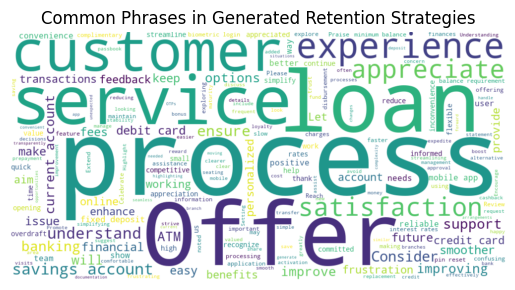

In [53]:
from wordcloud import WordCloud

text = " ".join(df["Retention Strategy"].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Phrases in Generated Retention Strategies")
plt.show()


📊 Average Effectiveness Across Sentiments:
Sentiment  total_strategies  effective_count  avg_score  effectiveness_pct
 Negative                15               10       3.87              66.67
  Neutral                48               14       2.52              29.17
 Positive                37               15       2.81              40.54


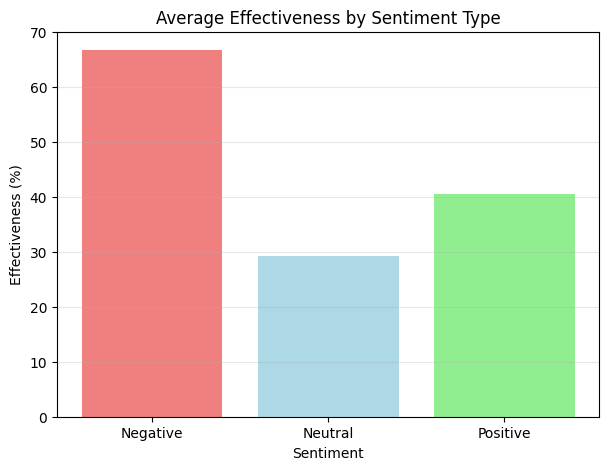

In [14]:
# scripts/analyze_effectiveness_by_sentiment.py
import pandas as pd

# === Paths ===
INP = "outputs/evaluated_retention_strategies.csv"

# === Load Data ===
df = pd.read_csv(INP)

# === Clean up sentiment and effectiveness columns ===
df["Sentiment"] = df["Sentiment"].str.strip().str.capitalize()
df["Strategy Effectiveness"] = df["Strategy Effectiveness"].fillna("Needs Review")

# === Map label to numeric value for averaging ===
label_to_num = {"Effective": 1, "Needs Review": 0}
df["Effectiveness_Score"] = df["Strategy Effectiveness"].map(label_to_num)

# === Group-level metrics ===
summary = (
    df.groupby("Sentiment")
      .agg(
          total_strategies=("Strategy Effectiveness", "count"),
          effective_count=("Effectiveness_Score", "sum"),
          avg_score=("Score", "mean"),
          effectiveness_pct=("Effectiveness_Score", "mean")
      )
      .reset_index()
)

# convert proportion to %
summary["effectiveness_pct"] = (summary["effectiveness_pct"] * 100).round(2)
summary["avg_score"] = summary["avg_score"].round(2)

# === Print summary ===
print("📊 Average Effectiveness Across Sentiments:")
print(summary.to_string(index=False))

# === Optional visualization ===
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(7,5))
    plt.bar(summary["Sentiment"], summary["effectiveness_pct"], color=["lightcoral", "lightblue", "lightgreen"])
    plt.title("Average Effectiveness by Sentiment Type")
    plt.xlabel("Sentiment")
    plt.ylabel("Effectiveness (%)")
    plt.grid(axis="y", alpha=0.3)
    plt.show()

except ImportError:
    print("matplotlib not installed — skipping visualization.")
